<a href="https://colab.research.google.com/github/sefsnf/Math152/blob/main/Exploration_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploration 2: Newton's method and basins of attraction

By: Tanner Boyea, Kelly Kirchner, Samuel Neff

Newton's Method is an algorithm used to approximate the roots of a differentiable function.

The method goes as followed:

First, you start with any guess as long as the function's derivative at that point is non-zero. We can call this guess $x_n$.
Then, you calculate the functions value and derivative at that point, we can call them $f(x_n)$ and $f'(x_n)$.
After this, you find the next term by $x_{n+1} = x - \frac{f(x_n)}{f'(x_n)}$.
We can epeat this step until sufficient enough precision.

#Tools:
First, we will need to import all packages we plan on using.
Numpy will be used to multiply lists and initialize the array of pixels, 
matplotlib.pyplot will be used to visualize the steps of convergence, 
PIL will be used to visualize the basins of attraction.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
     

Newton's Fractal Setup

In [84]:
import random as rand

#-----------------------------COLORS-----------------------------

# list of default matlab colors
colorList = [ [0.0   , 0.4470, 0.7410],\
              [0.8500, 0.3250, 0.0980],\
              [0.9290, 0.6940, 0.1250],\
              [0.4660, 0.6740, 0.1880],\
              [0.3010, 0.7450, 0.9330],\
              [0.6350, 0.0780, 0.1840] ]

def getColor(n):
  # returns nth color from colorlist. if n geq len, return random color 
  if (n < len(colorList)):
      return colorList(n)
  else:
      return [rand.random(), rand.random(), rand.random()]


#-----------------------------MATH-----------------------------

# note: ik these are all functions in numpy.
def polyDeriv(coeffs):
  # returns the derivative of a polynomial whose nth degree coefficients are coeffs[n]
  # output is again a list of coefficents
  return [coeffs[n+1]*(n+1) for n in range(0,len(coeffs)-1)]

def polyEval(coeffs, X):
  # evaluates a polynomial at an array of numpy points X
  out = np.zeros(np.shape(X))
  for n in range(0,len(coeffs)):
      out = np.add(out, np.multiply(np.power(X,n), coeffs[n]))
  return out

def polyToString(coeffs):
  # makes stuff readable
  out = ""
  for n in range(len(coeffs)-1,-1,-1):
      out += str(coeffs[n]) + "x^" + str(n)
      if (n>0): out += " + "
  return out  

#-----------------------------MATH-----------------------------


In [58]:
print(polyEval([0,1,-2,3],np.array([3+2j,4])))
print(polyToString([1j,1,2,3]))
print(polyToString(polyDeriv([1j,1,2,3])))

[-34.+116.j 164.  +0.j]
3x^3 + 2x^2 + 1x^1 + 1jx^0
9x^2 + 4x^1 + 1x^0


In [ ]:
def polyNewtMethod(coeffs, X, itter):
    # newtons method for arbitrary numpy initial guess
    # returns where different values of X lands
    # note we use a for-loop rather than a recursive scheme because we expect the sequence for different values of X to converge at wildly different rates
    pdivcoeffs = polyDeriv(coeffs)
    for n in range(0,itter):
        X = np.add(  X, -np.divide( polyEval(coeffs,X),\
                                    polyEval(pdivcoeffs,X) )  )
        
    return X

In [178]:
#TODO: varables for range
def newtFractal(coeffs, itter):
    # displays newton's fractal for a list of coefficients after some itterations
    X,Y = np.meshgrid(np.linspace(-20, 20, 500),\
                      np.linspace(-20, 20, 500))

    InVal = np.add(X, np.multiply(Y,1j))
    zeros = polyNewtMethod(coeffs, InVal, itter)

    tempvar = np.uint8(np.angle(zeros))
    imgArray = np.array(np.zeros(np.shape(X)+tuple( [3] ))) #TODO: very much not newton's fractal (color values by the root they are closet to)
    imgArray[:,:,1] = tempvar * 200
    imgArray = np.uint8(imgArray)

    img = Image.fromarray(imgArray) # Create an image from the array.
    display(img)

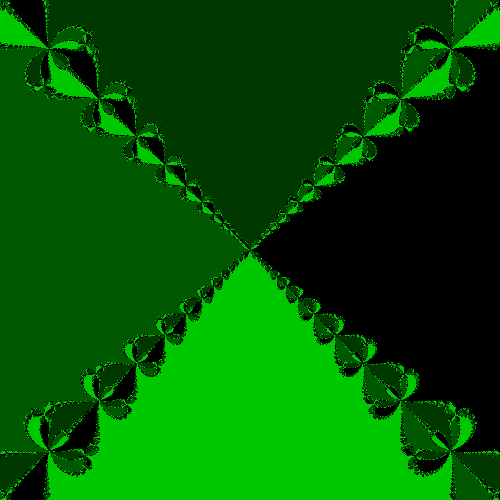

In [183]:
#test block-remember to delete
#polyNewtMethod([100,0,-1], [10.1], 1000)
newtFractal([-1,0,0,0,1], 80)